In [42]:
import pandas as pd
from sklearn import preprocessing

df_train = pd.read_csv("a1.csv")

le = preprocessing.LabelEncoder()
df_train['Sex']=le.fit_transform(df_train['Sex'])
df_train.set_index("id",inplace=True)
df_train                                                     

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8
...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10


In [43]:
le = preprocessing.LabelEncoder()
df_test['Sex']=le.fit_transform(df_test['Sex'])
df_test.set_index("id",inplace=True)
df_test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
id,,,,,,,,
74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066
...,...,...,...,...,...,...,...,...
123414,0,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309
123415,1,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687
123416,0,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345


In [44]:
import numpy as np

train = df_train

condition1 = train['Weight']<train['Shucked Weight']
train['Weight'] = np.where(condition1,train['Shucked Weight'],train['Weight'])
train[condition1]

condition2 = (train['Shucked Weight'] + train['Viscera Weight'] + train['Shell Weight'])>train['Weight']
train[condition2]
sum_weight = train['Shucked Weight'] + train['Viscera Weight'] + train['Shell Weight']
train['Weight'] = np.where(condition2,sum_weight,train['Weight'])
train[condition2]

train["Area_Crab"]=train["Length"]*train["Diameter"]
train["Weight_Area"]=train["Weight"]/train["Area_Crab"]
train["Length_Poly"]=train["Length"]*train["Length"]
train["Diameter_Poly"]=train["Diameter"]*train["Diameter"]


train


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Area_Crab,Weight_Area,Length_Poly,Diameter_Poly
id,,,,,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1.791875,16.169202,2.325625,1.380625
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0.907500,11.480376,1.210000,0.680625
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1.543594,16.051803,1.925156,1.237656
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,2.401250,21.097577,2.890000,1.995156
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1.265625,18.401275,1.562500,1.025156
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,2.098906,24.136646,2.763906,1.593906
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,0.927188,11.267182,1.155625,0.743906
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,1.785000,16.517356,2.212656,1.440000


In [45]:
import numpy as np

test = df_test
condition1 = test['Weight']<test['Shucked Weight']
test['Weight'] = np.where(condition1,test['Shucked Weight'],test['Weight'])
test[condition1]

condition2 = (test['Shucked Weight'] + test['Viscera Weight'] + test['Shell Weight'])>test['Weight']
test[condition2]
sum_weight = test['Shucked Weight'] + test['Viscera Weight'] + test['Shell Weight']
test['Weight'] = np.where(condition2,sum_weight,test['Weight'])
test[condition2]

test["Area_Crab"]=test["Length"]*test["Diameter"]
test["Weight_Area"]=test["Weight"]/test["Area_Crab"]

test["Length_Poly"]=test["Length"]*test["Length"]
test["Diameter_Poly"]=test["Diameter"]*test["Diameter"]


test

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Area_Crab,Weight_Area,Length_Poly,Diameter_Poly
id,,,,,,,,,,,,
74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0.800625,10.764400,1.102500,0.581406
74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1.031719,15.030430,1.351406,0.787656
74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1.271406,11.461044,1.657656,0.975156
74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1.530625,18.540041,2.402500,0.975156
74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0.945625,12.441552,1.237656,0.722500
...,...,...,...,...,...,...,...,...,...,...,...,...
123414,0,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,1.348750,12.096487,1.690000,1.076406
123415,1,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,0.791094,12.990488,1.076406,0.581406
123416,0,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,1.729219,18.148598,2.212656,1.351406


<Axes: >

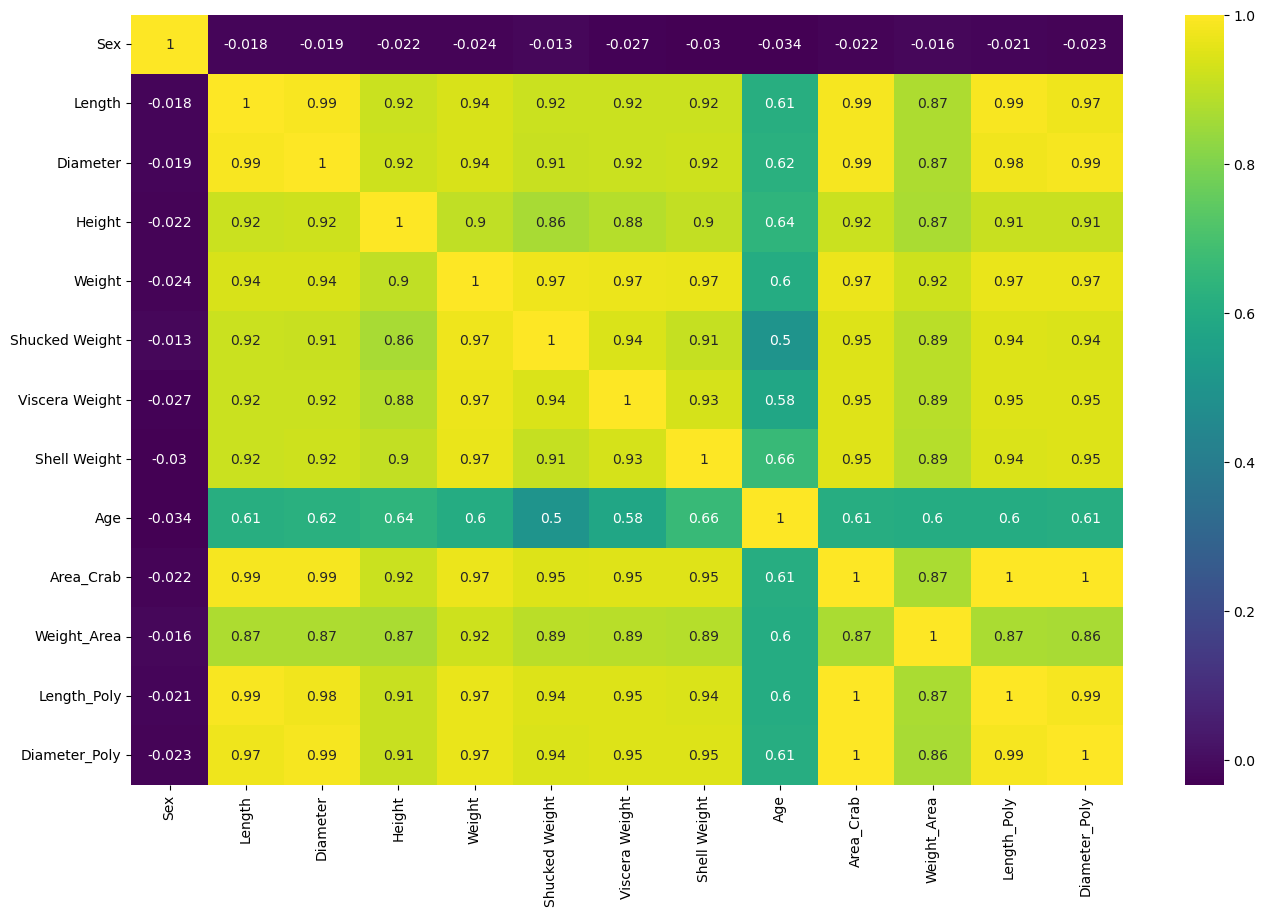

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(train.corr(),annot=True,cmap='viridis')

In [47]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Area_Crab', 'Weight_Area',
       'Length_Poly', 'Diameter_Poly'],
      dtype='object')

<Axes: >

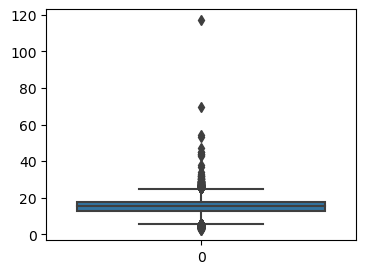

In [48]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Weight_Area'])

In [49]:
indices = train[(train['Weight_Area']>22) | (train['Weight_Area']<7) ].index
train.loc[indices,'Weight_Area'] = train['Weight_Area'].mean()


<Axes: >

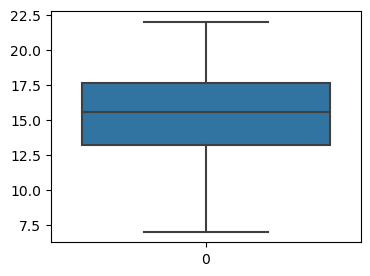

In [50]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Weight_Area'])

<Axes: >

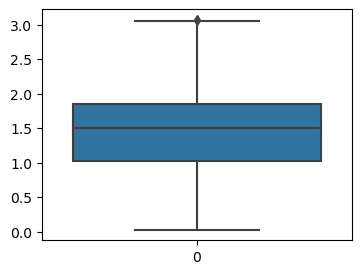

In [51]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Area_Crab'])

<Axes: >

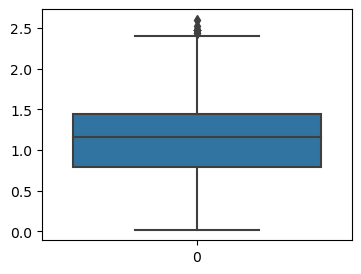

In [52]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Diameter_Poly'])

<Axes: >

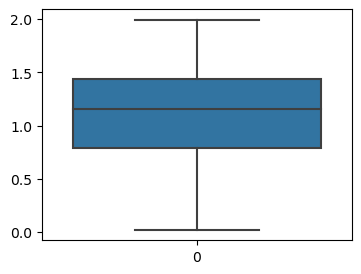

In [53]:
indices = train[(train['Diameter_Poly']>2)].index
train.loc[indices,'Diameter_Poly'] = train['Diameter_Poly'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Diameter_Poly'])

<Axes: >

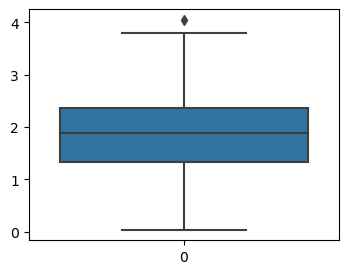

In [54]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Length_Poly'])

<Axes: >

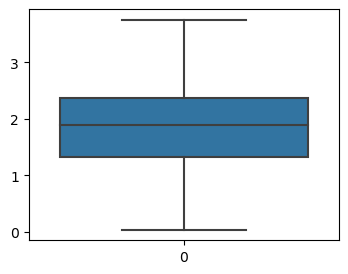

In [55]:
indices = train[(train['Length_Poly']>3.8)].index
train.loc[indices,'Length_Poly'] = train['Length_Poly'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Length_Poly'])

<Axes: >

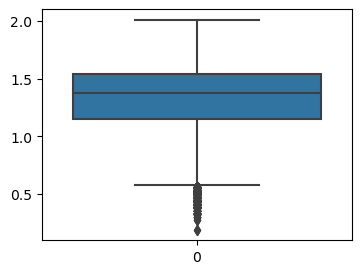

In [56]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Length'])

<Axes: >

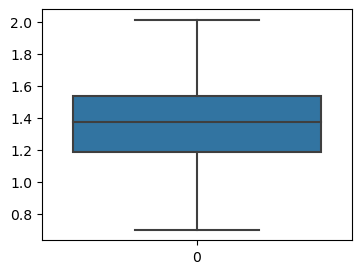

In [57]:
indices = train[(train['Length']<0.7)].index
train.loc[indices,'Length'] = train['Length'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Length'])

<Axes: >

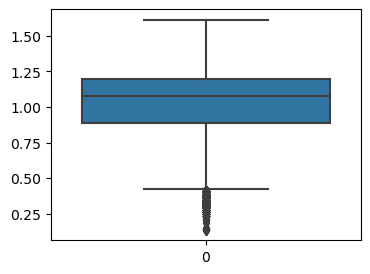

In [58]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Diameter'])

<Axes: >

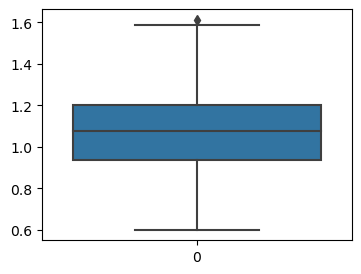

In [59]:
indices = train[(train['Diameter']<0.6)].index
train.loc[indices,'Diameter'] = train['Diameter'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Diameter'])

<Axes: >

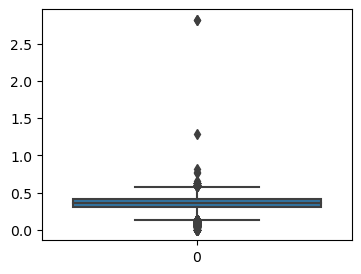

In [60]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Height'])

<Axes: >

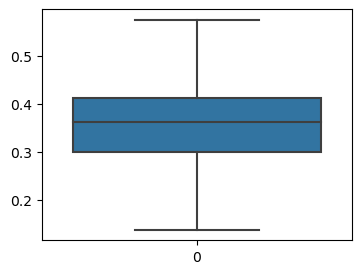

In [61]:
indices = train[(train['Height']>0.58) | (train['Height']<0.13)].index
train.loc[indices,'Height'] = train['Height'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Height'])

<Axes: >

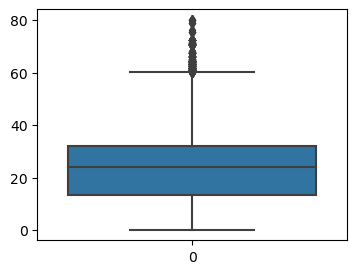

In [62]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Weight'])

<Axes: >

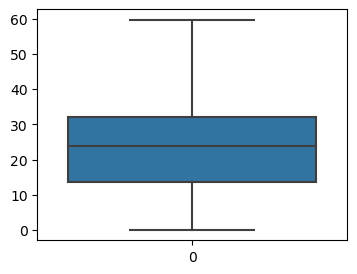

In [63]:
indices = train[(train['Weight']>60)].index
train.loc[indices,'Weight'] = train['Weight'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Weight'])

<Axes: >

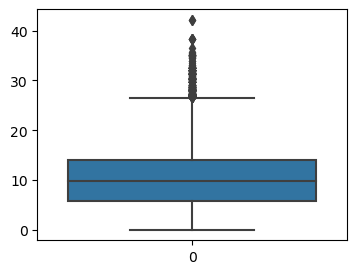

In [64]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Shucked Weight'])

<Axes: >

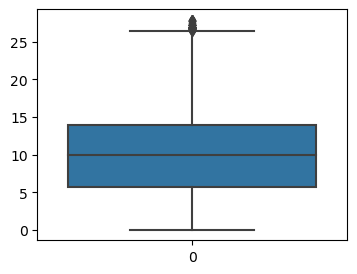

In [65]:
indices = train[(train['Shucked Weight']>28)].index
train.loc[indices,'Shucked Weight'] = train['Shucked Weight'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Shucked Weight'])

<Axes: >

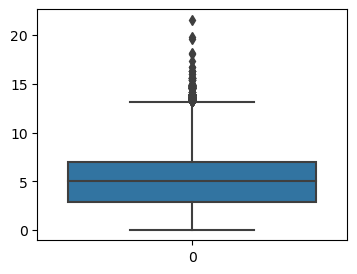

In [66]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Viscera Weight'])

<Axes: >

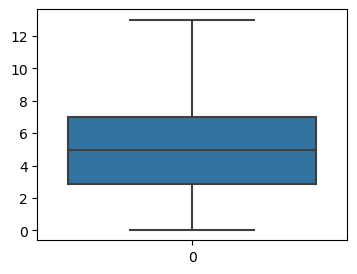

In [67]:
indices = train[(train['Viscera Weight']>13)].index
train.loc[indices,'Viscera Weight'] = train['Viscera Weight'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Viscera Weight'])

<Axes: >

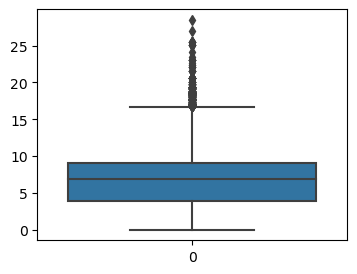

In [68]:
plt.figure(figsize=(4,3))
sns.boxplot(train['Shell Weight'])

<Axes: >

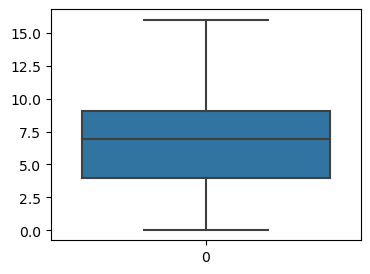

In [69]:
indices = train[(train['Shell Weight']>16)].index
train.loc[indices,'Shell Weight'] = train['Shell Weight'].mean()
plt.figure(figsize=(4,3))
sns.boxplot(train['Shell Weight'])

In [81]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age', 'Area_Crab', 'Weight_Area',
       'Length_Poly', 'Diameter_Poly'],
      dtype='object')

In [84]:
import numpy as np

# Veri setindeki tüm bağımsız değişkenleri içeren bir liste
bagimsiz_degiskenler = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Area_Crab', 'Weight_Area',
       'Length_Poly', 'Diameter_Poly']
# Log dönüşümü uygulanmış değişkenleri depolamak için bir DataFrame
log_degiskenler = pd.DataFrame()

# Tüm bağımsız değişkenleri log dönüşümüne tabi tutma döngüsü
for degisken in bagimsiz_degiskenler:
    log_degiskenler['log_' + degisken] = np.log(train[degisken])

# Log dönüşümü yapılan değişkenleri mevcut veri setine eklemek için pd.merge kullanma
train = pd.merge(train, log_degiskenler, left_index=True, right_index=True)

# Sonuçları kontrol etmek için veri setini yazdırma
train


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Area_Crab,...,log_Diameter,log_Height,log_Weight,log_Shucked Weight,log_Viscera Weight,log_Shell Weight,log_Area_Crab,log_Weight_Area,log_Length_Poly,log_Diameter_Poly
id,,,,,,,,,,,,,,,,,,,,,
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,1.791875,...,0.161268,-0.980829,3.366371,2.543877,1.894310,2.122133,0.583263,2.783108,0.843989,0.322536
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0.907500,...,-0.192372,-1.290984,2.343577,1.508898,0.843573,1.224346,-0.097062,2.440639,0.190620,-0.384744
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,1.543594,...,0.106610,-0.980829,3.209934,2.428319,1.714969,1.896440,0.434113,2.775821,0.655007,0.213219
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,2.401250,...,0.345361,-0.693147,3.925148,3.013324,2.397153,2.707843,0.875989,3.049158,1.061257,0.690722
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,1.265625,...,0.012423,-1.086190,3.147986,2.483044,1.505758,1.783962,0.235566,2.912420,0.446287,0.024845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74046,0,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10,2.098906,...,0.233094,-0.826679,3.925148,3.029213,2.338120,2.512200,0.741416,2.727480,1.016645,0.466188
74047,1,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6,0.927188,...,-0.147920,-1.290984,2.346295,1.464019,0.831303,1.265168,-0.075599,2.421894,0.144641,-0.295840
74048,0,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10,1.785000,...,0.182322,-0.885519,3.383830,2.509899,2.020350,2.089343,0.579418,2.804412,0.794194,0.364643


In [85]:
import numpy as np

# Veri setindeki tüm bağımsız değişkenleri içeren bir liste
bagimsiz_degiskenler = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Area_Crab', 'Weight_Area',
       'Length_Poly', 'Diameter_Poly']
# Log dönüşümü uygulanmış değişkenleri depolamak için bir DataFrame
log_degiskenler = pd.DataFrame()

# Tüm bağımsız değişkenleri log dönüşümüne tabi tutma döngüsü
for degisken in bagimsiz_degiskenler:
    log_degiskenler['log_' + degisken] = np.log(test[degisken])

# Log dönüşümü yapılan değişkenleri mevcut veri setine eklemek için pd.merge kullanma
test = pd.merge(test, log_degiskenler, left_index=True, right_index=True)

# Sonuçları kontrol etmek için veri setini yazdırma
test


/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Area_Crab,Weight_Area,...,log_Diameter,log_Height,log_Weight,log_Shucked Weight,log_Viscera Weight,log_Shell Weight,log_Area_Crab,log_Weight_Area,log_Length_Poly,log_Diameter_Poly
id,,,,,,,,,,,,,,,,,,,,,
74051,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,0.800625,10.764400,...,-0.271153,-1.290984,2.153882,1.296667,0.547728,1.001202,-0.222363,2.376244,0.097580,-0.542306
74052,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1.031719,15.030430,...,-0.119347,-1.290984,2.741303,1.950283,1.177429,1.378497,0.031226,2.710077,0.301146,-0.238694
74053,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,1.271406,11.461044,...,-0.012579,-1.123930,2.679077,1.714969,1.356835,1.572653,0.240124,2.438954,0.505405,-0.025158
74054,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,1.530625,18.540041,...,-0.012579,-0.948039,3.345609,2.593833,1.879272,1.950283,0.425676,2.919933,0.876510,-0.025158
74055,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,0.945625,12.441552,...,-0.162519,-1.337504,2.465133,1.709854,0.902762,1.203292,-0.055909,2.521042,0.213219,-0.325038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123414,0,1.3000,1.0375,0.3250,16.315137,6.690482,5.173784,3.756309,1.348750,12.096487,...,0.036814,-1.123930,2.792093,1.900686,1.643604,1.323437,0.299178,2.492915,0.524729,0.073628
123415,1,1.0375,0.7625,0.2625,10.276694,4.436697,1.998640,3.543687,0.791094,12.990488,...,-0.271153,-1.337504,2.329879,1.489910,0.692467,1.265168,-0.234339,2.564217,0.073628,-0.542306
123416,0,1.4875,1.1625,0.3625,31.382897,11.396499,6.846404,8.788345,1.729219,18.148598,...,0.150573,-1.014731,3.446263,2.433306,1.923724,2.173426,0.547670,2.898593,0.794194,0.301146


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = train.drop('Age', axis=1)  # 'Age' sütununu çıkararak bağımsız değişkenleri alın
y = train['Age']  # 'Age' sütununu bağımlı değişken olarak ayırın

# Z-standardizasyon için scaler oluşturma



# Eğitim ve test veri kümelerini oluşturun
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Sonuçları gösterin
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59240, 23)
X_test shape: (14811, 23)
y_train shape: (59240,)
y_test shape: (14811,)


In [111]:
X_train

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Area_Crab,Weight_Area,...,log_Diameter,log_Height,log_Weight,log_Shucked Weight,log_Viscera Weight,log_Shell Weight,log_Area_Crab,log_Weight_Area,log_Length_Poly,log_Diameter_Poly
id,,,,,,,,,,,,,,,,,,,,,
20612,2,1.6125,1.1500,0.4000,31.269499,15.252031,6.265239,7.059025,1.854375,16.862554,...,0.139762,-0.916291,3.442643,2.724713,1.835017,1.954307,0.617548,2.825095,0.955572,0.279524
2935,0,1.5250,1.1750,0.4125,30.220567,12.232809,7.002326,8.930093,1.791875,16.865332,...,0.161268,-0.885519,3.408523,2.504122,1.946242,2.189427,0.583263,2.825260,0.843989,0.322536
73847,2,1.5000,1.1625,0.3875,29.114936,13.125818,6.166016,8.079607,1.743750,16.696738,...,0.150573,-0.948039,3.371251,2.574581,1.819053,2.089343,0.556038,2.815213,0.810930,0.301146
46445,2,1.1250,0.8875,0.2375,12.998246,5.499803,2.891649,3.685435,0.998437,13.018587,...,-0.119347,-1.437588,2.564814,1.704712,1.061827,1.304389,-0.001564,2.566378,0.235566,-0.238694
66755,1,0.8625,0.6375,0.1875,4.280774,1.644271,0.737087,1.275727,0.549844,7.785438,...,-0.450201,-1.673976,1.454134,0.497297,-0.305049,0.243517,-0.598121,2.052255,-0.295840,-0.900402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1,0.7000,1.0750,0.2000,2.211261,0.935534,0.510291,0.765436,0.367500,15.294302,...,0.072321,-1.609438,0.793563,-0.066638,-0.672774,-0.267309,-1.001032,2.727480,-0.713350,-1.288714
6265,0,1.6500,1.2750,0.5250,39.859397,17.605040,8.093782,11.623295,2.103750,18.946832,...,0.242946,-0.644357,3.685358,2.868185,2.091096,2.453011,0.743721,2.941637,1.001551,0.485892
54886,2,1.6750,1.3500,0.4375,42.013959,20.950281,8.292229,10.347568,2.261250,18.579971,...,0.300105,-0.826679,3.738002,3.042152,2.115319,2.336751,0.815918,2.922084,1.031626,0.600209


In [91]:
from sklearn.linear_model import Lasso

# Lasso regresyon modeli oluşturma
lasso_model = Lasso(alpha=0.1)  # alpha parametresi, modelin karmaşıklığını kontrol eder

# Lasso regresyon modelini eğitme
lasso_model.fit(X, y)

# Katsayıları ve sıfırdan farklı olan önemli değişkenleri belirleme
katsayilar = lasso_model.coef_
onemli_degiskenler = X.columns[np.abs(katsayilar) > 0]

# Önemli değişkenleri yazdırma
print("Önemli Değişkenler:")
print(onemli_degiskenler)


Önemli Değişkenler:
Index(['Weight', 'Shucked Weight', 'Shell Weight', 'Weight_Area',
       'log_Shell Weight'],
      dtype='object')


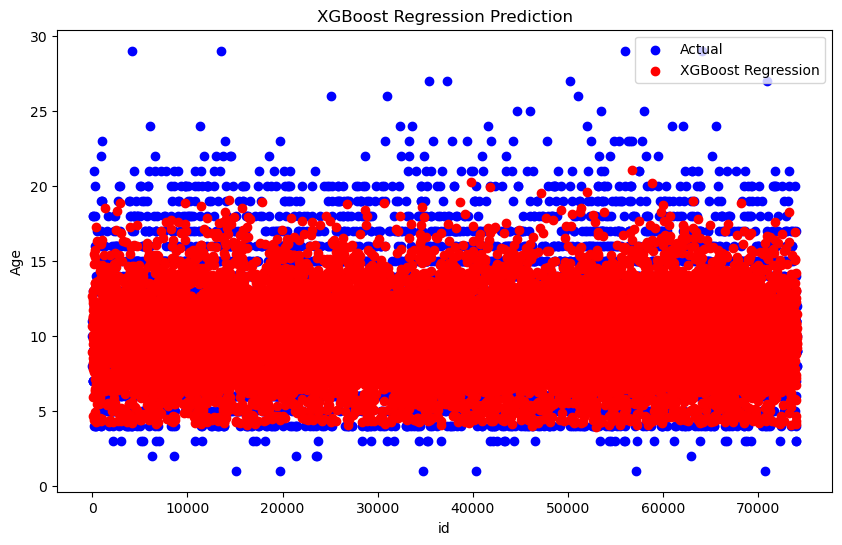

In [94]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test.index, y_test, color='blue', label='Actual')
plt.scatter(X_test.index, y_pred_xgb_grid, color='red', label='XGBoost Regression')
plt.xlabel('id')
plt.ylabel('Age')
plt.title('XGBoost Regression Prediction')
plt.legend()
plt.show()

In [77]:
model_grid = XGBRegressor(n_estimators=330 , 
                          learning_rate=0.01 ,
                          max_depth=7)
model_grid.fit(X_train, y_train)
y_pred_xgb_grid_sub = model_grid.predict(test)
y_pred_xgb_grid_sub

array([ 7.3322234,  7.631117 , 10.565728 , ..., 13.061962 ,  9.810994 ,
       12.091651 ], dtype=float32)

In [79]:
submission_df['Age'] = [round(i) for i in y_pred_lgb_grid]
submission_df

,id,Age
0,74051,8
1,74052,8
2,74053,11
3,74054,9
4,74055,7
...,...,...
49363,123414,11
49364,123415,8
49365,123416,13
49366,123417,10


In [80]:
submission_df.to_csv("submission.csv" , index=False)